# Predator Prey Model
Here is some code to plot the Phase Portrait and time solutions to the Predator-Prey Model.
Recall: the equations are given by
$$\frac{dx}{dt} = ax-bxy, \quad \frac{dy}{dt} = -cy+dxy$$
The parameters a, b, c, d are below.  Pay attention to how the steady-state changes, how the arrows change, and how the axes change, as they are currently set to be twice the steady-state values.
You can also change the EndTime, which is the length of time the numerical solution will run, it can be seen in the populations vs. time graph.

Hit the Run button in the menu, or press Shift+Enter to run the line of code.

The nontrivial steady-state is:  ( 1.0 , 4.0 )


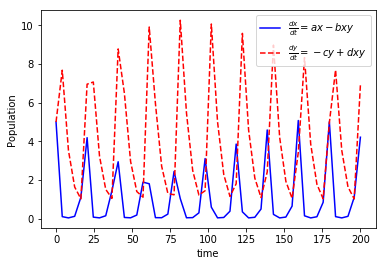

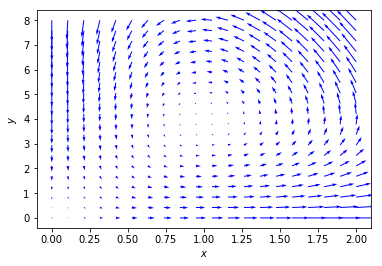

In [3]:
a=.8
b=.2
c=.2
d=.2

EndTime=200

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PPmodel(X,t):
  return np.array([a*X[0] - b*X[0]*X[1],-c*X[1]+d*X[0]*X[1]])
x=np.linspace(0,c/d*2,20)
y=np.linspace(0,a/b*2,20)
X,Y=np.meshgrid(x,y)
t = 0
u, v = np.zeros(X.shape), np.zeros(Y.shape)
NI, NJ = X.shape
for i in range(NI):
    for j in range(NJ):
        xx = X[i, j]
        yy = Y[i, j]
        yprime = PPmodel([xx, yy], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
print("The nontrivial steady-state is:  (", c/d, ",", a/b, ")")
t=np.linspace(0,EndTime)
z=odeint(PPmodel,[5,5],t)
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=ax-bxy$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-cy+dxy$')
plt.ylabel('Population')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
Q = plt.quiver(X, Y, u, v,color='b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


# Competition Model
Recall the competition model is given by the following equations:
$$\frac{dN_1}{dt} = r_1N_1\left(\frac{K_1-N_1-\beta_1N_2}{K_1}\right),\quad \frac{dN_2}{dt} = r_2N_2\left(\frac{K_2-N_2-\beta_1N_1}{K_2}\right)$$
The parameters are the r's, K's, and beta's.  Recall, the K's is similar to the carrying capacity for the populations (or they would be if there was only one population).  Beta_1 is the measurement of how aggressive population N2 is, while beta_2 is the measurement of how aggressive is the population N1.
You can also change the EndTime which determines how long the solutions run in the populations vs. time graph.
The numerical solution is affected by the initial conditions, and the numerical solution with those initial conditions is included in the phase plane. 

The nontrivial steady-state is:  ( 166.66666666666669 , 166.66666666666669 )


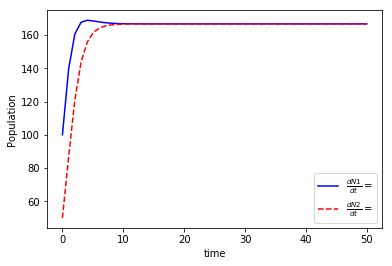

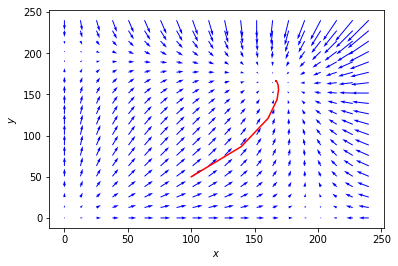

In [8]:
r1=1
r2=1
K1=200
K2=200
beta1=.2
beta2=.2

EndTime=50

N1initial = 100
N2initial = 50

def Competition(N,t):
  return np.array([r1*N[0]*(K1-N[0]-beta1*N[1])/K1,r2*N[1]*(K2-N[1]-beta2*N[0])/K2])
x=np.linspace(0,K1*1.2,20)
y=np.linspace(0,K2*1.2,20)
X,Y=np.meshgrid(x,y)
t = 0
u, v = np.zeros(X.shape), np.zeros(Y.shape)
NI, NJ = X.shape
for i in range(NI):
    for j in range(NJ):
        xx = X[i, j]
        yy = Y[i, j]
        yprime = Competition([xx, yy], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
print("The nontrivial steady-state is:  (", (K1-beta1*K2)/(1-beta1*beta2), ",", (K2-beta2*K1)/(1-beta1*beta2), ")")
t=np.linspace(0,EndTime)
z2=odeint(Competition,[N1initial,N2initial],t)
plt.plot(t,z2[:,0],'b-',label=r'$\frac{dN1}{dt}=$')
plt.plot(t,z2[:,1],'r--',label=r'$\frac{dN2}{dt}=$')
plt.ylabel('Population')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
Q = plt.quiver(X, Y, u, v, color='b')
plt.plot(z2[:,0],z2[:,1],color='r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()